In [1]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("/home/sajad/PycharmProjects/pos-tagger-lstm/exp/bijankhan_lbl/word2vec.model")
print("Model loaded")

Model loaded


In [2]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 100), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 100)


/home/sajad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [3]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [4]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [5]:
points.head(10)

,word,x,y
0,هيچكاره,26.347370,-42.034035
1,صفي آباد,17.323868,8.095435
2,فسادي,3.043359,-31.242859
3,بيانيهٌ,36.960323,14.840918
4,فولادشهر,29.271402,-14.949944
5,نكته ي,-16.203520,-32.721050
6,بي گمان,-20.811365,-4.527387
7,ماموران,21.892950,31.232016
8,رله‌هاي,-0.546508,3.137036
9,تيموريان,7.288804,25.838360


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("poster")

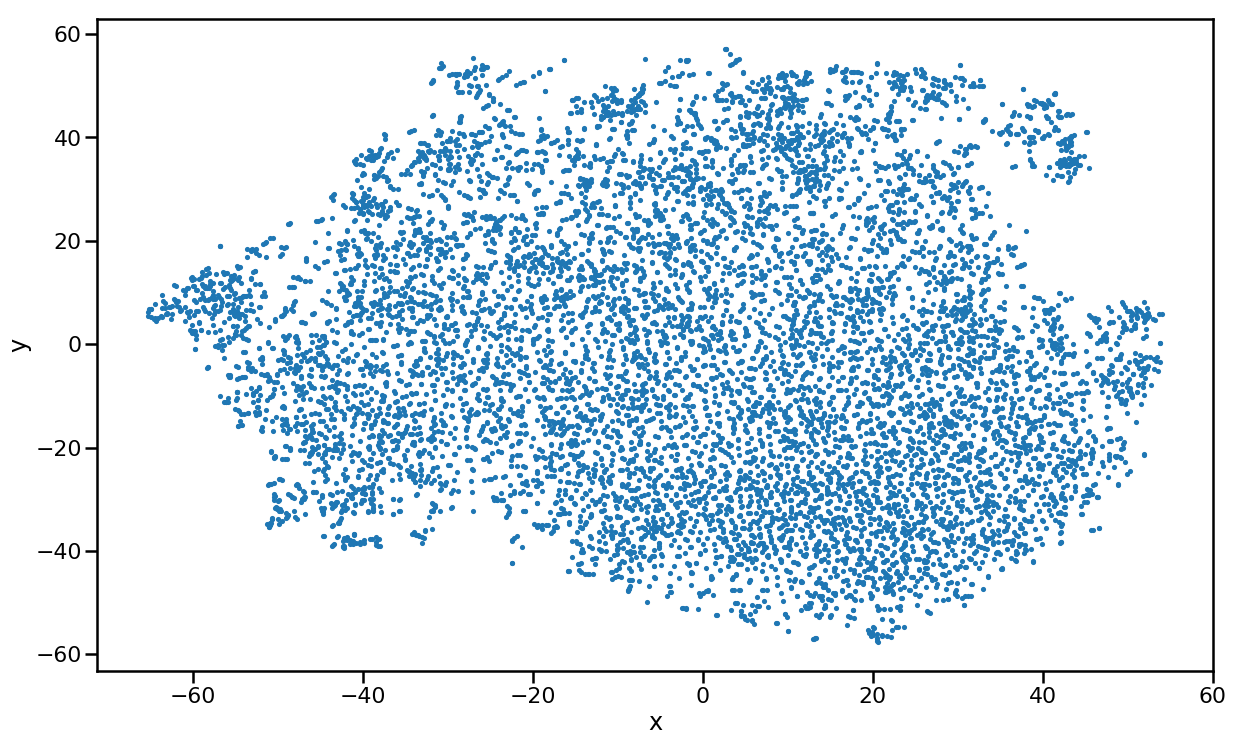

In [7]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [8]:
from bidi.algorithm import get_display
import arabic_reshaper
def plot_region(x_bounds, y_bounds):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():


        ax.text(point.x + 0.005, point.y + 0.005, get_display(arabic_reshaper.reshape(point.word)), fontsize=12)

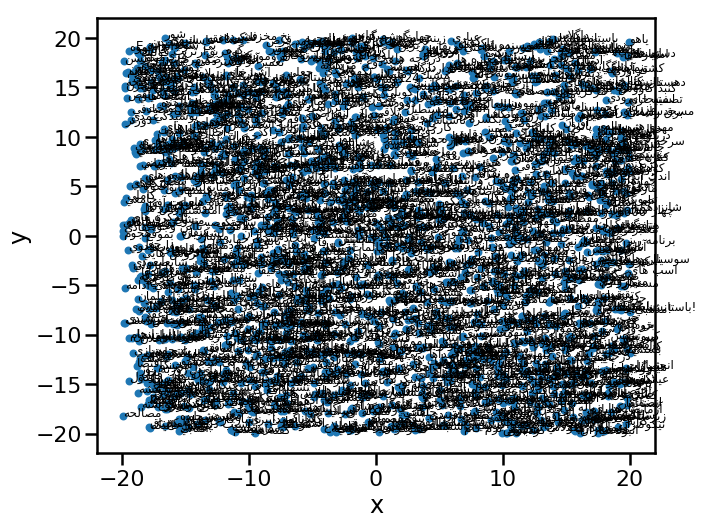

In [9]:
plot_region(x_bounds=(-20, 20), y_bounds=(-20, 20))

In [27]:
import codecs

for w in w2v_model.most_similar(u"باشگاه"):
    print (w[0])
    


فدراسيون
تيم هاي
تيمهاي
مادريد
راال
كنفدراسيون
هلند
بارسلونا
كشورمان
اردوي


/home/sajad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
